<a href="https://colab.research.google.com/github/FediBeltaief/Machine-Learning/blob/main/tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Dropout , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

Mounted at /content/drive


In [ ]:
def load_images_from_folder(folder,label,size=(64,64)):
  images = []
  labels = []
  for filename in os.listdir(folder):
    path = os.path.join(folder,filename)
    try:
      img = load_img(path,target_size=size, color_mode='grayscale')
      img_array =img_to_array(img).flatten()
      images.append(img_array)
      labels.append(label)
    except:
      continue
  return images,labels


data_path='/content/drive/MyDrive/Covid19-dataset'

train_covid = os.path.join(data_path,'train/Covid')
train_normal = os.path.join(data_path,'train/Normal')
test_covid = os.path.join(data_path,'test/Covid')
test_normal = os.path.join(data_path,'test/Normal')


X_train_covid,y_train_covid = load_images_from_folder(train_covid,"Covid")
X_train_normal,y_train_normal = load_images_from_folder(train_normal,"Normal")
X_test_covid,y_test_covid = load_images_from_folder(test_covid,"Covid")
X_test_normal,y_test_normal = load_images_from_folder(test_normal,"Normal")

X_train = np.array(X_train_covid + X_train_normal)
y_train = np.array(y_train_covid + y_train_normal)
X_test = np.array(X_test_covid + X_test_normal)
y_test = np.array(y_test_covid + y_test_normal)

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=15,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(data_path+'/train',target_size=(224,224),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(data_path+'/test',target_size=(224,224),batch_size=32,class_mode='binary',shuffle =False)


Found 181 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [ ]:
from ast import Global
base_model = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in base_model.layers:
  layer.trainable=False
X = base_model.output
x = GlobalAveragePooling2D()(X)
x = Dense(256,activation='relu')(x)

x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
epochs = 50
predictions = Dense(1,activation='sigmoid')(x)
model_vgg19 = Model(inputs=base_model.input,outputs=predictions)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5699 - loss: 1.4607 - val_accuracy: 0.9565 - val_loss: 0.1297
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9193 - loss: 0.2719 - val_accuracy: 0.9565 - val_loss: 0.2027
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9366 - loss: 0.1369 - val_accuracy: 0.9783 - val_loss: 0.0783
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9592 - loss: 0.1351 - val_accuracy: 0.9783 - val_loss: 0.0642
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9843 - loss: 0.0374 - val_accuracy: 0.9783 - val_loss: 0.0762
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9851 - loss: 0.0294 - val_accuracy: 0.8696 - val_loss: 0.4004
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9879 - loss: 0.0464 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9783 - loss: 0.0425 - val_accuracy: 0.9565 - val_loss: 0.1304
Epoch 9/50
6/6 

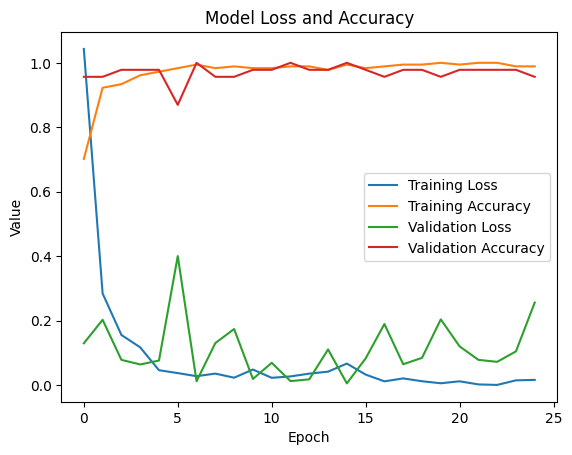

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 741ms/step


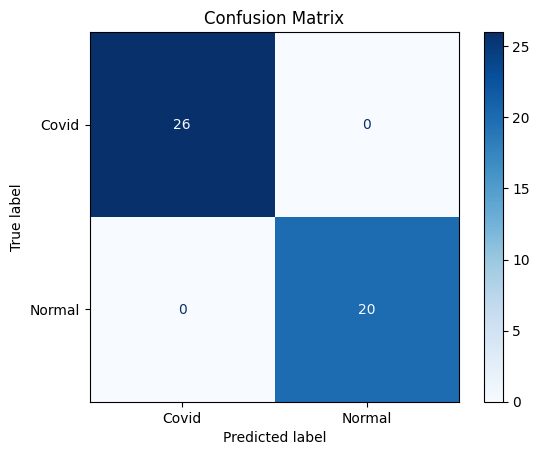

In [ ]:
model_vgg19.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy']) # Changed loss to binary_crossentropy

early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

history = model_vgg19.fit(train_generator,
                          epochs=epochs,
                          validation_data=test_generator,
                          callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

y_pred_prob = model_vgg19.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_vgg19.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,814,661 (79.40 MB)

 Trainable params: 263,425 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 526,852 (2.01 MB)